In [2]:
import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pandas as pd 
import pandas_datareader.data as web
import datetime
import numpy as np 
from matplotlib import style

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Get the stock data using yahoo API:
style.use('ggplot')

# get 2014-2018 data to train our model
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2018,12,30)
df = web.DataReader("TSLA", 'yahoo', start, end) 

# get 2019 data to test our model on 
start = datetime.datetime(2019,1,1)
end = datetime.date.today()
test_df = web.DataReader("TSLA", 'yahoo', start, end) 

In [4]:
# sort by date
df = df.sort_values('Date')
test_df = test_df.sort_values('Date')

# fix the date 
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
test_df.reset_index(inplace=True)
test_df.set_index("Date", inplace=True)

df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-21,64.694000,62.487999,63.480000,63.953999,40084000,63.953999
2018-12-24,62.900002,59.040001,62.700001,59.077999,27799500,59.077999
2018-12-26,65.393997,58.818001,60.000000,65.218002,40815500,65.218002
2018-12-27,64.433998,60.299999,63.967999,63.226002,42875500,63.226002
2018-12-28,67.248001,63.681999,64.620003,66.774002,49695000,66.774002


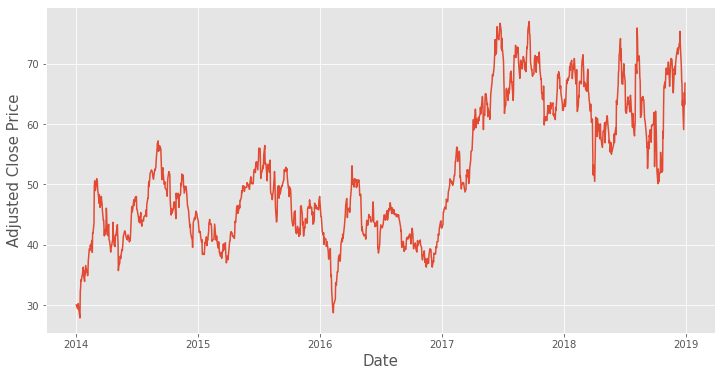

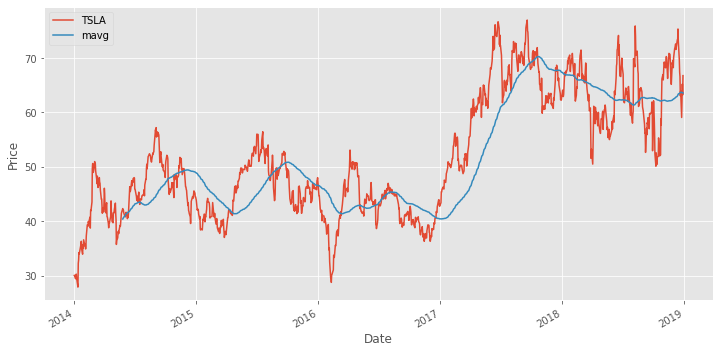

In [5]:
# Visualize the training stock data:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,6))
plt.plot(df["Adj Close"])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Adjusted Close Price',fontsize=15)
plt.show()


# Rolling mean
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

plt.figure(figsize = (12,6))
close_px.plot(label='TSLA')
mavg.plot(label='mavg')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [6]:
import matplotlib.dates as mdates

# change the dates into ints for training 
dates_df = df.copy()
dates_df = dates_df.reset_index()

# Store the original dates for plotting the predicitons
org_dates = dates_df['Date']

# convert to ints
dates_df['Date'] = dates_df['Date'].map(mdates.date2num)

dates_df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1252,737049.0,64.694000,62.487999,63.480000,63.953999,40084000,63.953999
1253,737052.0,62.900002,59.040001,62.700001,59.077999,27799500,59.077999
1254,737054.0,65.393997,58.818001,60.000000,65.218002,40815500,65.218002
1255,737055.0,64.433998,60.299999,63.967999,63.226002,42875500,63.226002
1256,737056.0,67.248001,63.681999,64.620003,66.774002,49695000,66.774002


In [17]:
# Use sklearn support vector regression to predicit our data:
from sklearn.svm import SVR

dates = dates_df['Date'].to_numpy()
prices = df['Adj Close'].to_numpy()



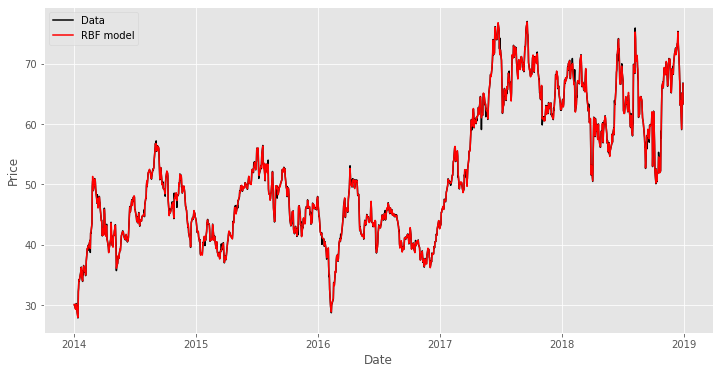

In [18]:
#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
svr_rbf.fit(dates, prices)

plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()